In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('http://64.111.127.166/origin-destination/date-hour-soo-dest-2016.csv.gz', header=None)

In [3]:
df.shape

(9971582, 5)

In [4]:
df.columns = ['date', 'hour', 'start', 'stop', 'riders']
df.head()

,date,hour,start,stop,riders
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


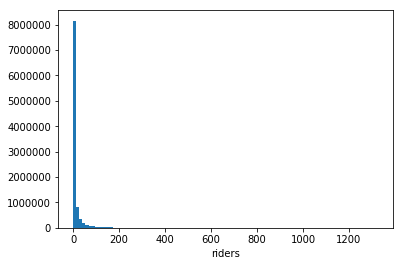

In [5]:
plt.hist(df['riders'], bins=100)
plt.xlabel('riders')
plt.show()

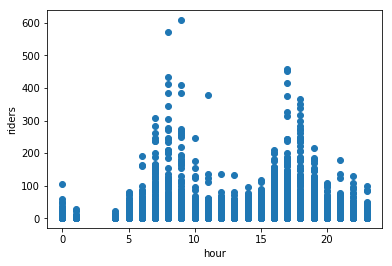

In [6]:
ss = df.sample(n=10_000)
plt.scatter(ss['hour'], ss['riders'])
plt.xlabel('hour')
plt.ylabel('riders')
plt.show()

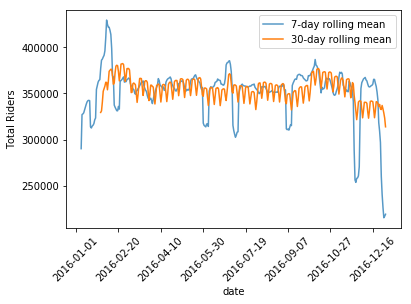

In [48]:
ser = pd.Series(df.groupby('date').apply(lambda x: x.riders.sum()))
ser.rolling(window=7).mean().plot(alpha=0.75, label='7-day rolling mean')
ser.rolling(window=30).mean().plot(alpha=1, label='30-day rolling mean')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Total Riders')
plt.show()

In [7]:
totaled = df.groupby(['start', 'stop']).apply(lambda x: sum(x.riders))

Text(0.5,0,'Total Riders (year=2016)')

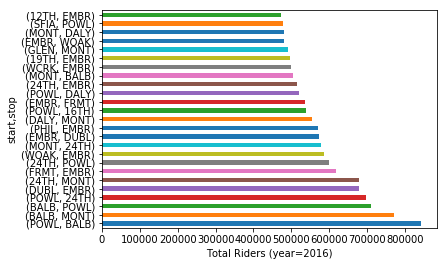

In [9]:
totaled.sort_values(ascending=False).head(25).plot(kind='barh')
plt.xlabel('Total Riders (year=2016)')